## ARIMA:
    AR: Auto Regression
    I: Integrated
    MA: Moving Average

#### 1. check data for stationary
#### by some hypothesis testing: Dickry Fuller test
    Hi: unit root <1 => Data is stantionary
    Ho: unit root =1 => Data is not stantionary

    
#### for stationary data:
    1. mean should be constant
    2. sd should also be constant
    
    
    
    if p < 0.05 h1 accept  
       p >0.05 ho accept


In [58]:
import pandas as pd
import matplotlib.pyplot as plit
import statsmodels.api as sms
import numpy as np
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/Bhushan0130/Datasets/main/airline_passengers.csv')

In [60]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [61]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [62]:
df.dropna(inplace = True)
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


             AR                          I                      MA
             Auto regression          differencing              moving average
             p                           d                        q

### Partial Auto correlation

In [64]:
df['Month'] = pd.to_datetime(df['Month'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [66]:
df.set_index('Month', inplace = True)

In [67]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

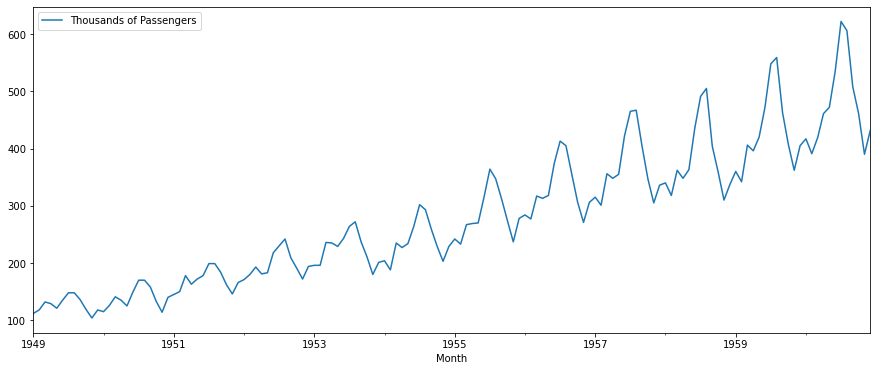

In [68]:
df.plot(figsize = (15, 6))

In [69]:
def adfuller_func(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('P value: {}'.format(result[1]))
    
    if result [1]<= 0.05:
        print('Stong evidence against null hypothesis, reject null hypothesis Data has no unit root, and is staionary')
        
        
    else :
        print('Weak evidence against null hypothesis. time series has a unit root, indicating its non-stationary')

In [70]:
adfuller_func(df['Thousands of Passengers'])

ADF Statistics: 0.8153688792060507
P value: 0.991880243437641
Weak evidence against null hypothesis. time series has a unit root, indicating its non-stationary


### Use differncing technique

In [71]:
df['differncing_1'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [72]:
df.head()

,Thousands of Passengers,differncing_1
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [73]:
# df.dropna(inplace= True)

In [74]:
adfuller_func(df['differncing_1'].dropna())

ADF Statistics: -2.8292668241699857
P value: 0.05421329028382734
Weak evidence against null hypothesis. time series has a unit root, indicating its non-stationary


In [75]:
df['differncing_2'] = df['differncing_1'] - df['differncing_1'].shift(1)

In [76]:
# df.dropna(inplace = True)

In [77]:
adfuller_func(df['differncing_2'].dropna())

ADF Statistics: -16.384231542468513
P value: 2.7328918500142026e-29
Stong evidence against null hypothesis, reject null hypothesis Data has no unit root, and is staionary


In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

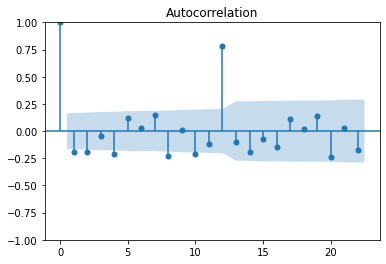

In [80]:
acf = plot_acf(df['differncing_2'].dropna())

/Users/bhushansharma/env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


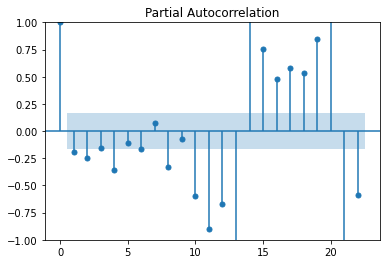

In [81]:
result = plot_pacf(df['differncing_2'].dropna())

In [85]:
df['differncing_12'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)

In [86]:
adfuller_func(df['differncing_12'].dropna())

ADF Statistics: -3.3830207264924805
P value: 0.011551493085514982
Stong evidence against null hypothesis, reject null hypothesis Data has no unit root, and is staionary


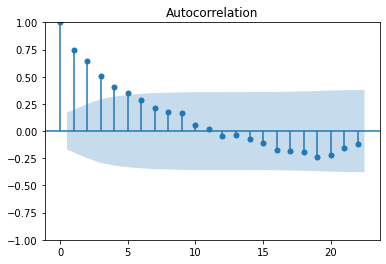

In [88]:
acf = plot_acf(df['differncing_12'].dropna())

/Users/bhushansharma/env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


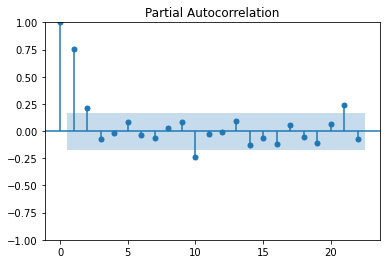

In [89]:
result = plot_pacf(df['differncing_12'].dropna())

In [90]:
df.head()

,Thousands of Passengers,differncing_1,differncing_2,differncing_12
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [91]:
from datetime import datetime, timedelta

In [92]:
train_df_end = datetime(1955, 12, 1)
test_df_end = datetime(1960, 12, 1)

In [94]:
train_data = df[: train_df_end]
test_data = df[train_df_end+timedelta(days=1): test_df_end]

In [97]:
# Prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [99]:
test_data.head()

,Thousands of Passengers,differncing_1,differncing_2,differncing_12
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0


In [100]:
# Model Learning

In [104]:
# from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [105]:
train_data.head()

,Thousands of Passengers,differncing_1,differncing_2,differncing_12
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [110]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order = (10, 2, 0))

/Users/bhushansharma/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhushansharma/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhushansharma/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [111]:
model_Arima = model_ARIMA.fit()

In [112]:
model_Arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Sun, 18 Sep 2022   AIC                            736.477
Time:                             02:06:49   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [113]:
# Prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [115]:
pred = model_Arima.predict(start = pred_start_date, end = pred_end_date)
residuals = test_data['Thousands of Passengers']- pred

In [120]:
pred

1956-01-01    300.183613
1956-02-01    309.478356
1956-03-01    316.443015
1956-04-01    307.827544
1956-05-01    318.544235
1956-06-01    348.922084
1956-07-01    366.020290
1956-08-01    346.567536
1956-09-01    332.120969
1956-10-01    307.734755
1956-11-01    311.623912
1956-12-01    339.828199
1957-01-01    349.840408
1957-02-01    356.098236
1957-03-01    350.687829
1957-04-01    350.080466
1957-05-01    361.157696
1957-06-01    381.216520
1957-07-01    382.319378
1957-08-01    372.852583
1957-09-01    364.110098
1957-10-01    356.108927
1957-11-01    371.293792
1957-12-01    385.323600
1958-01-01    392.077843
1958-02-01    391.405855
1958-03-01    388.404584
1958-04-01    391.572861
1958-05-01    402.448085
1958-06-01    413.255691
1958-07-01    410.853421
1958-08-01    407.670548
1958-09-01    402.486339
1958-10-01    406.089152
1958-11-01    418.125320
1958-12-01    426.012382
1959-01-01    429.205588
1959-02-01    427.352237
1959-03-01    428.150994
1959-04-01    432.790854


In [116]:
residuals

Month
1956-01-01    -16.183613
1956-02-01    -32.478356
1956-03-01      0.556985
1956-04-01      5.172456
1956-05-01     -0.544235
1956-06-01     25.077916
1956-07-01     46.979710
1956-08-01     58.432464
1956-09-01     22.879031
1956-10-01     -1.734755
1956-11-01    -40.623912
1956-12-01    -33.828199
1957-01-01    -34.840408
1957-02-01    -55.098236
1957-03-01      5.312171
1957-04-01     -2.080466
1957-05-01     -6.157696
1957-06-01     40.783480
1957-07-01     82.680622
1957-08-01     94.147417
1957-09-01     39.889902
1957-10-01     -9.108927
1957-11-01    -66.293792
1957-12-01    -49.323600
1958-01-01    -52.077843
1958-02-01    -73.405855
1958-03-01    -26.404584
1958-04-01    -43.572861
1958-05-01    -39.448085
1958-06-01     21.744309
1958-07-01     80.146579
1958-08-01     97.329452
1958-09-01      1.513661
1958-10-01    -47.089152
1958-11-01   -108.125320
1958-12-01    -89.012382
1959-01-01    -69.205588
1959-02-01    -85.352237
1959-03-01    -22.150994
1959-04-01    -36.7

<AxesSubplot:ylabel='Density'>

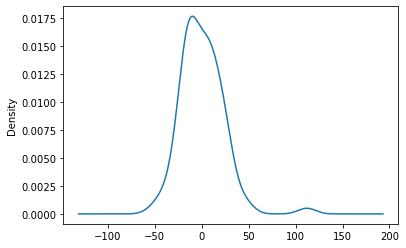

In [117]:
model_Arima.resid.plot(kind = 'kde')

In [118]:
test_data['Predicted_ARIMA']  = pred

/var/folders/9j/sr8_jh0x4b14zk2gmyqvh2400000gn/T/ipykernel_28142/2208642096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']  = pred


<AxesSubplot:xlabel='Month'>

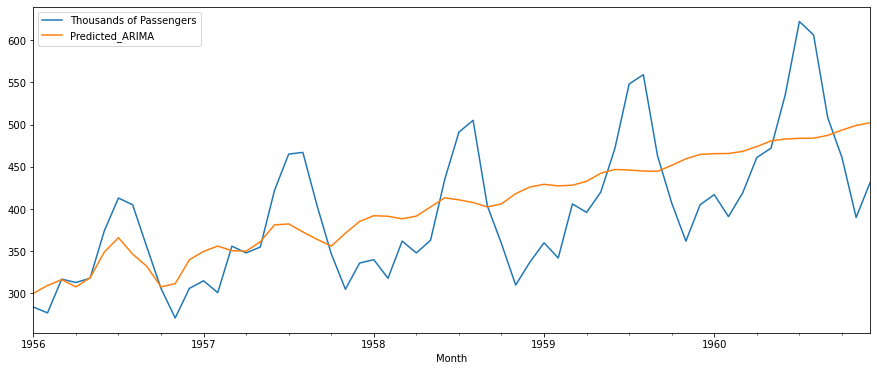

In [121]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA' ]].plot(figsize = (15,6))

In [122]:
test_data

,Thousands of Passengers,differncing_1,differncing_2,differncing_12,Predicted_ARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183613
1956-02-01,277.0,-7.0,-13.0,44.0,309.478356
1956-03-01,317.0,40.0,47.0,50.0,316.443015
1956-04-01,313.0,-4.0,-44.0,44.0,307.827544
1956-05-01,318.0,5.0,9.0,48.0,318.544235
1956-06-01,374.0,56.0,51.0,59.0,348.922084
1956-07-01,413.0,39.0,-17.0,49.0,366.020290
1956-08-01,405.0,-8.0,-47.0,58.0,346.567536
1956-09-01,355.0,-50.0,-42.0,43.0,332.120969


In [144]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

In [145]:
# model_sarimax = SARIMAX(train_data['Thousands of Passengers'], order = (0,2,0), seasonal_order = (1,0,1,12))

In [146]:
# model_sarimax_fit = model_sarimax.fit()

In [147]:
# model_sarimax_fit.summary()

In [148]:
# test_data.head()

In [149]:
# # Prediction
# pred_start_date = test_data.index[0]
# pred_end_date = test_data.index[-1]
# print(pred_start_date)
# print(pred_end_date)

In [150]:
# pred_sarima = model_sarimax_fit.predict(start =pred_start_date, end = pred_end_date)

# residual_s = test_data['Thousands of Passengers'] -pred_sarima

In [151]:
# model_sarimax_fit.resid.plot()

In [152]:
# model_sarimax_fit.resid.plot(kind = 'kde')

In [153]:
# pred_sarima

In [154]:
# test_data['Pred_sarmax']=pred_sarima

In [155]:
# test_data [['Thousands of Passengers','Predicted_ARIMA','Pred_sarmax']].plot()